In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
#reading dataset
data=pd.read_csv("cancer.csv")

In [3]:
data.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome   
0       1397.0               469             164.9          489.8      61898  \
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   population  povertyPercent  studyPerCap  MedianAge  MedianAgeMale   
0      260131            11.2   499.748204       39.3           36.9  \
1       43269            18.6    23.111234       33.0           32.2   
2       21026            14.6    47.560164       45.0           44.0   
3       75882            17.1   342.637253       42.8           42.2   
4       10321            12.5     0.000000       48.3           47.8   

   MedianAgeFemale  AvgHouseholdSize  PctPrivateCoverage   
0             41.7              2.54                75.1  \
1             33.7              2.34                70.2   
2             45.8              2.62                63.7   
3             43.4              2.52                58.4   
4             48.9              2.34                61.6   

   PctPrivateCoverageAlone  PctEmpPrivCoverage  PctPublicCoverage   
0                      NaN                41.6               32.9  \
1                     53.8                43.6               31.1   
2                     43.5                34.9               42.1   
3                     40.3                35.0               45.3   
4                     43.9                35.1               44.0   

   PctPublicCoverageAlone  BirthRate  
0                    14.0   6.118831  
1                    15.3   4.333096  
2                    21.1   3.729488  
3                    25.0   4.603841  
4                    22.7   6.796657

In [4]:
data.shape

(3047, 18)

 ## our dataset contains 3047 rows and 18 columns.
 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   population               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  AvgHouseholdSize         3047 non-null   float64
 12  PctPrivateCoverage       3047 non-null   float64
 13  PctPrivateCoverageAlone  2438 non-null   float64
 14  PctEmpPrivCoverage      

In [6]:
data.isna().sum()

avgAnnCount                  0
avgDeathsPerYear             0
TARGET_deathRate             0
incidenceRate                0
medIncome                    0
population                   0
povertyPercent               0
studyPerCap                  0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
AvgHouseholdSize             0
PctPrivateCoverage           0
PctPrivateCoverageAlone    609
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
BirthRate                    0
dtype: int64

In [7]:
data.fillna(data.PctPrivateCoverageAlone.mode().values[0],inplace=True)

In [8]:
data.isna().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
population                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
BirthRate                  0
dtype: int64

## now our dataset doesnot contain any null data

In [9]:
#data.drop(['MedianAge'],axis=1,inplace=True)
data.shape


(3047, 18)



## scatter plot

<Axes: >

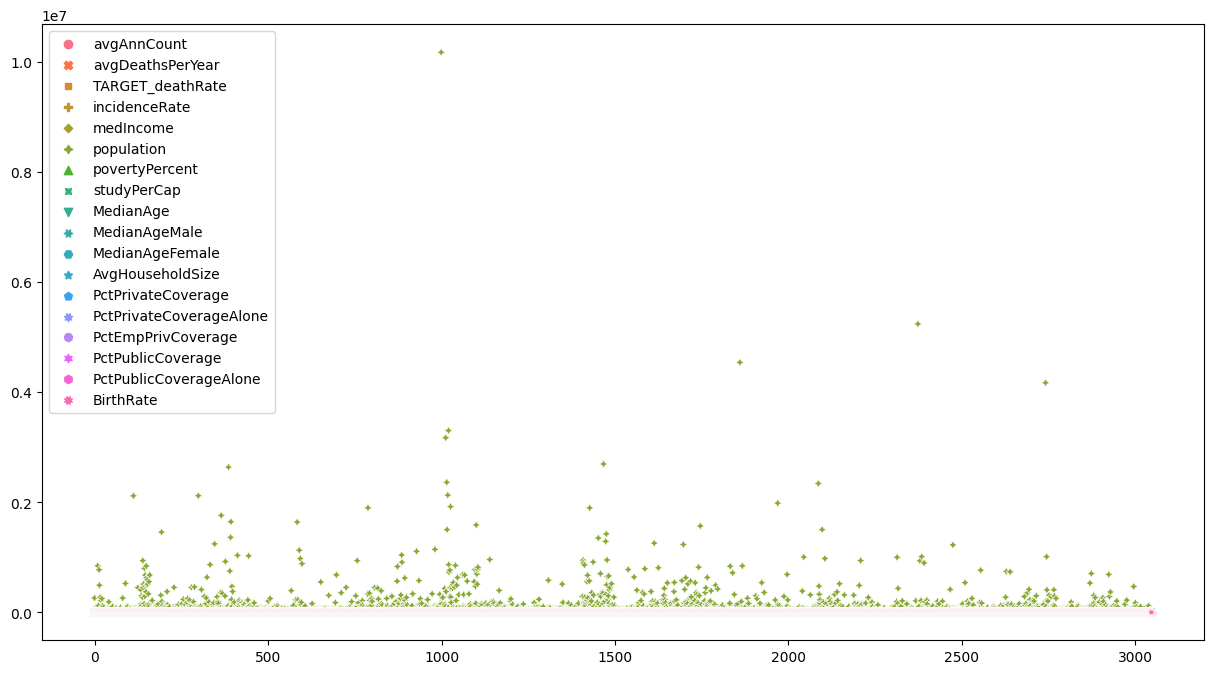

In [10]:
plt.figure(figsize=(15,8))
sns.scatterplot(data)

## Data exploration

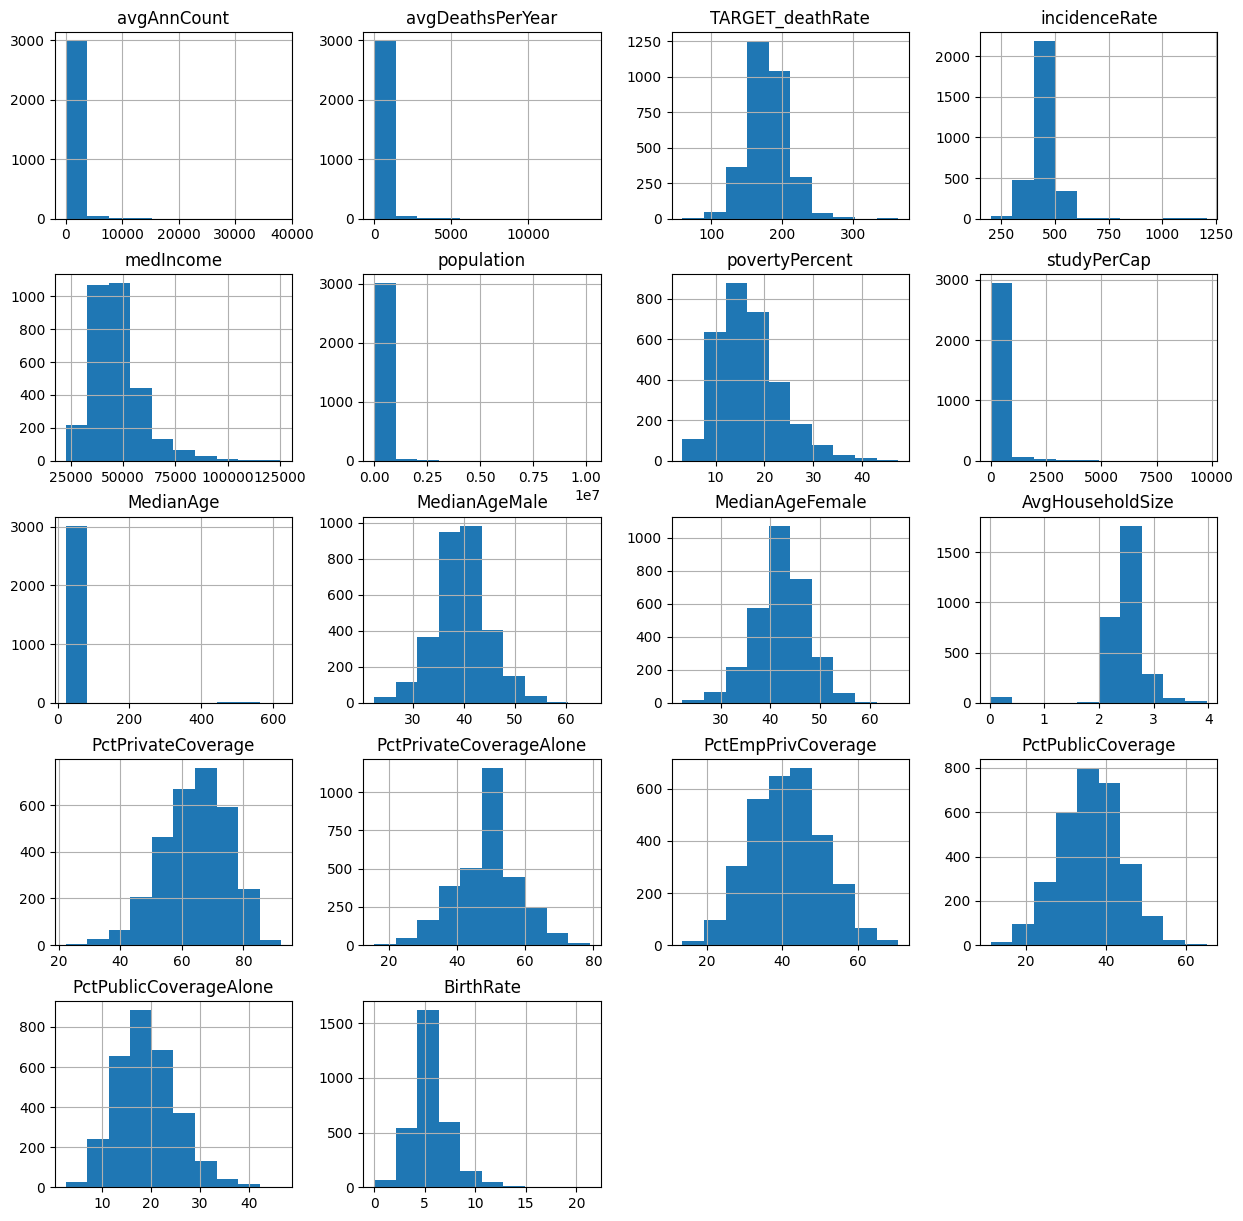

In [11]:
#plt.figure(figsize=(15,8))
data.hist(figsize=(15,15));
#for bars in ax.containers:
 #   ax.bar_label(bars)

<Axes: >

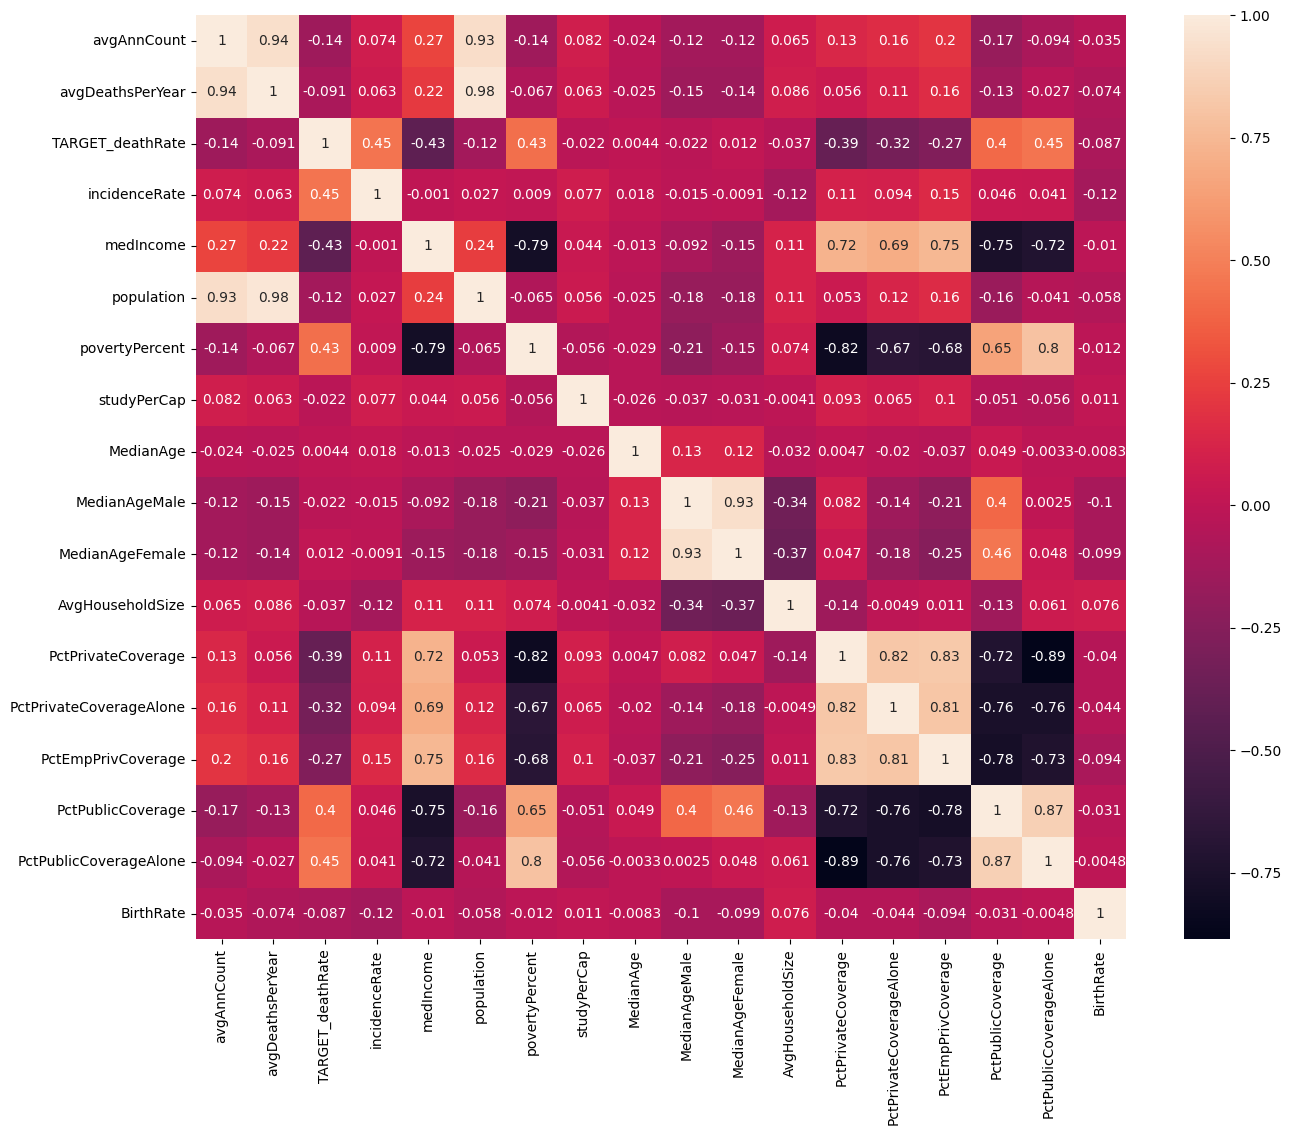

In [12]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)

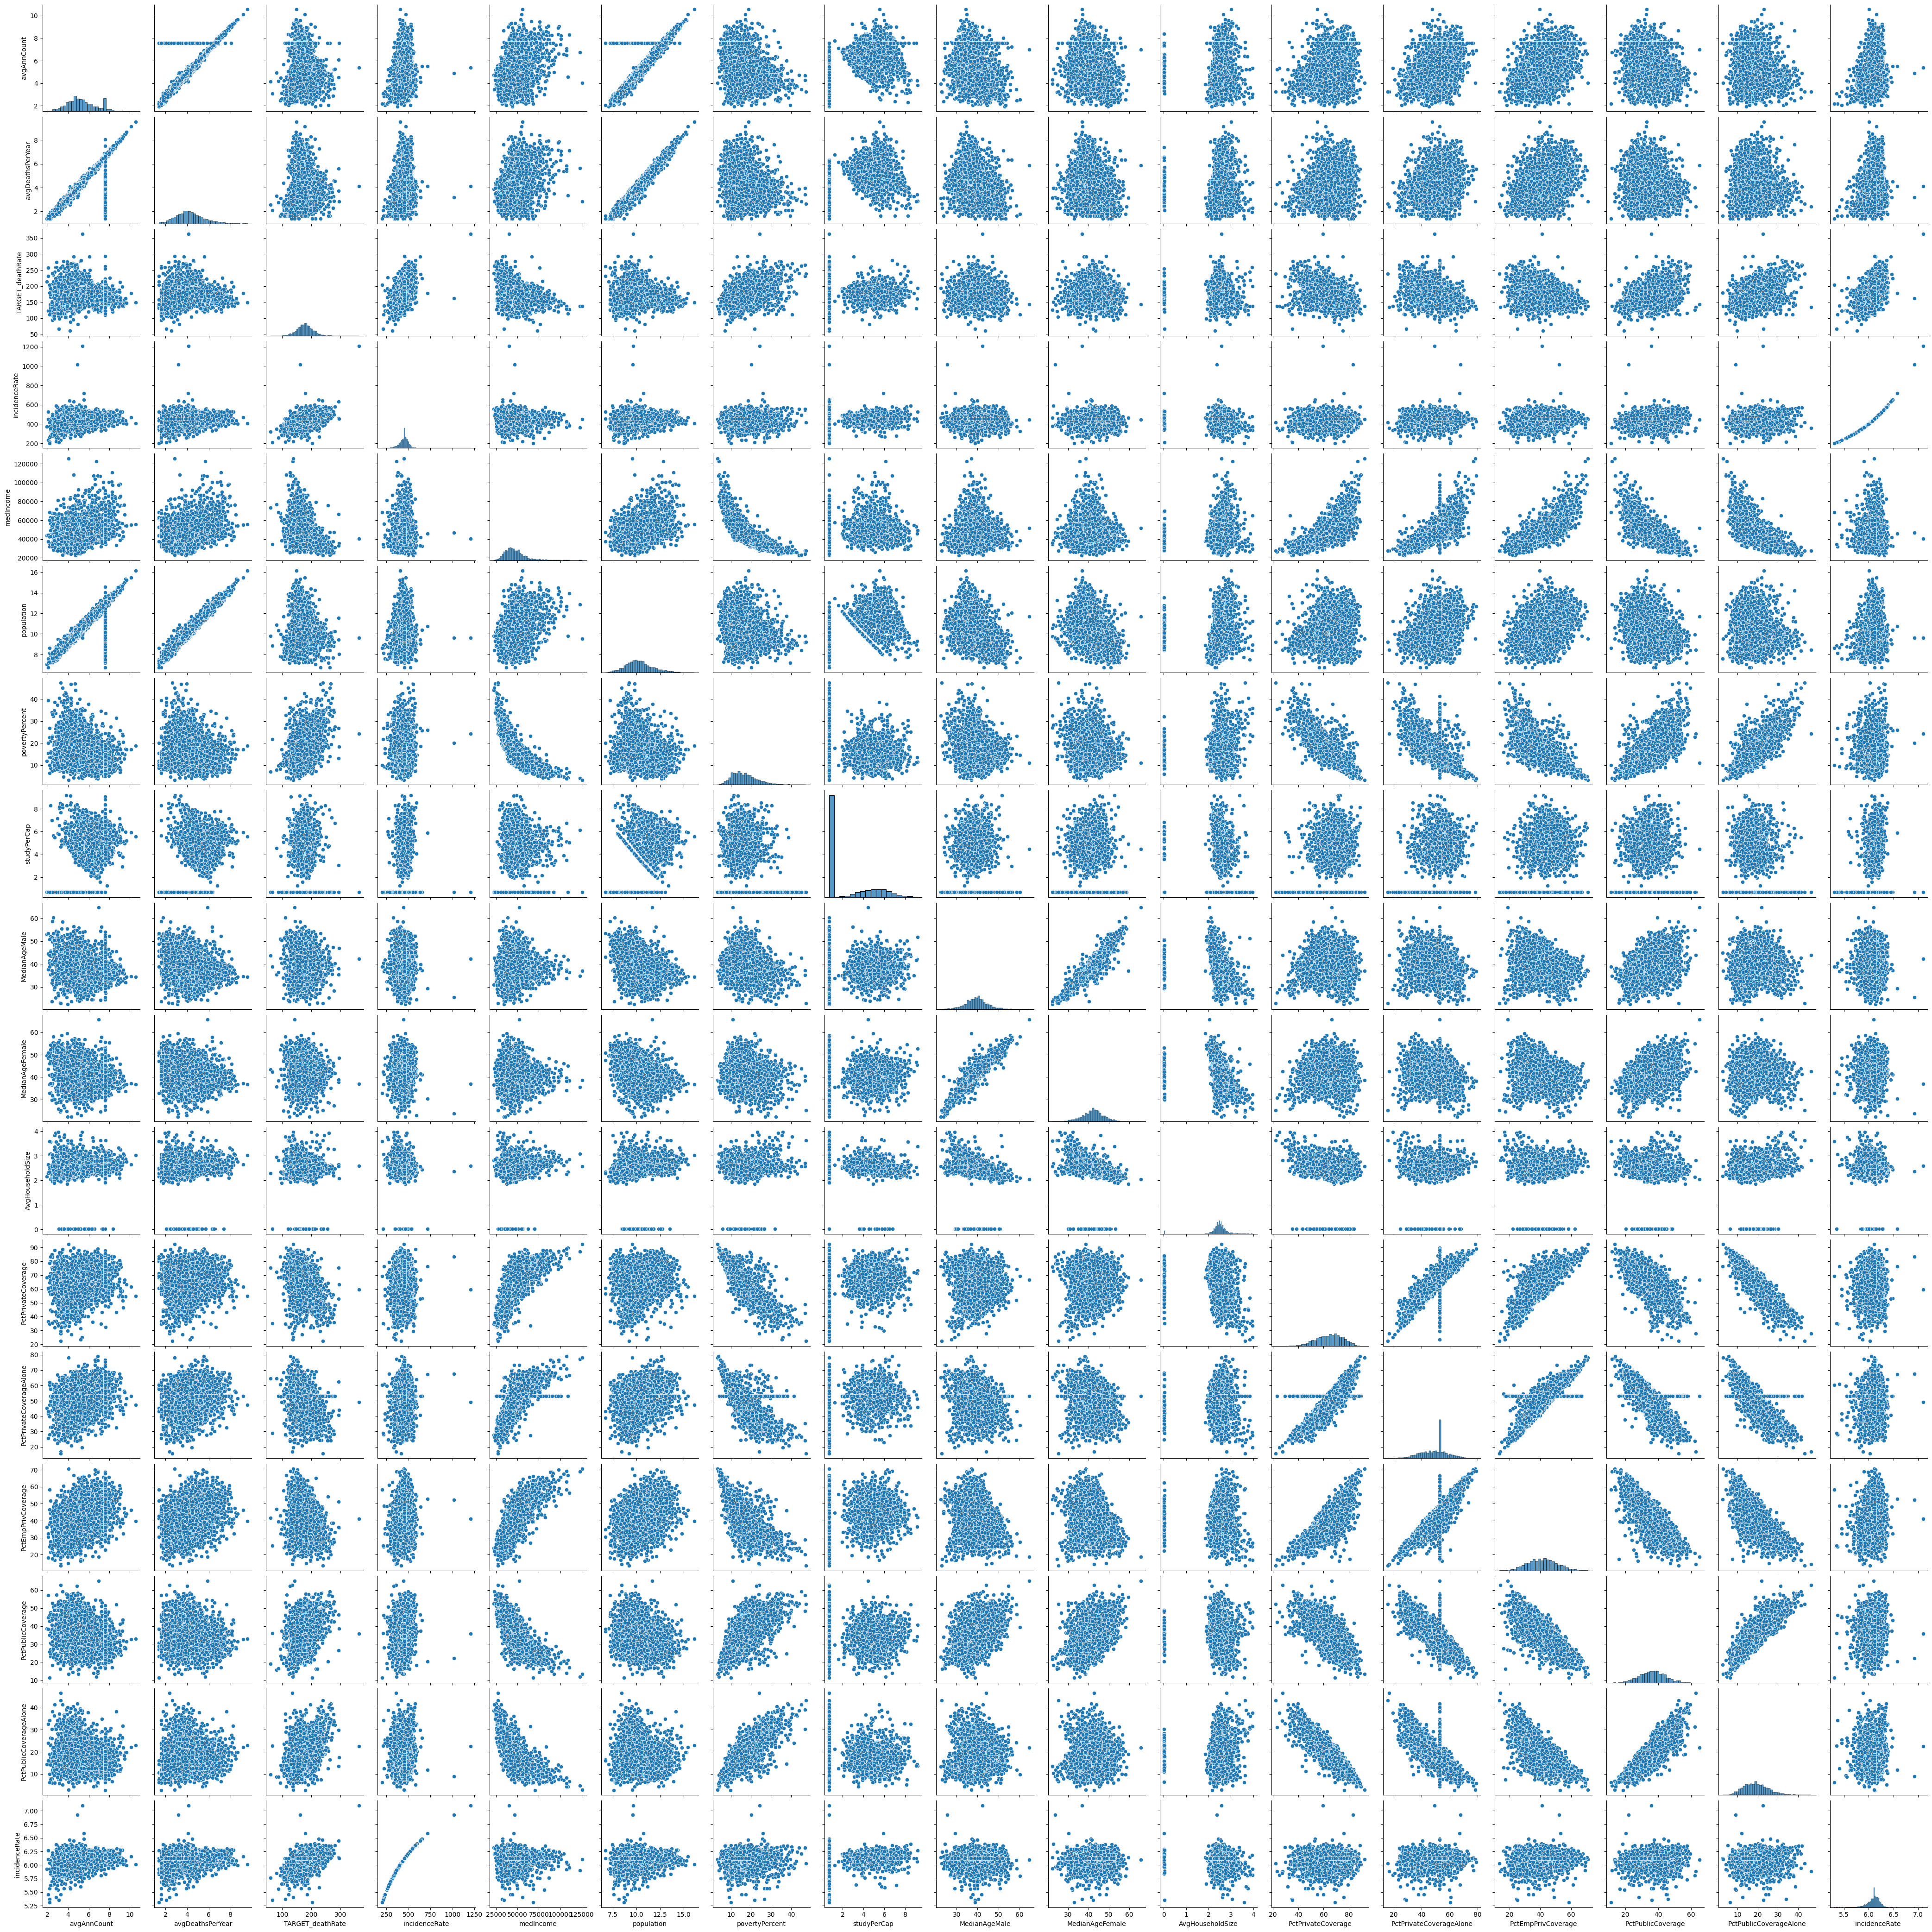

In [32]:
sns.pairplot(data)

In [14]:
data.drop(['MedianAge','BirthRate' ],axis=1,inplace=True)
data.shape

(3047, 16)

In [15]:
data['avgAnnCount']=np.log(data['avgAnnCount']+1)                
data['avgDeathsPerYear']=np.log(data['avgDeathsPerYear']+1)
data['population']=np.log(data['population']+1)                               
data['incidenceRate ']=np.log(data['incidenceRate']+1 ) 
data['studyPerCap']=np.log(data['studyPerCap']+2)


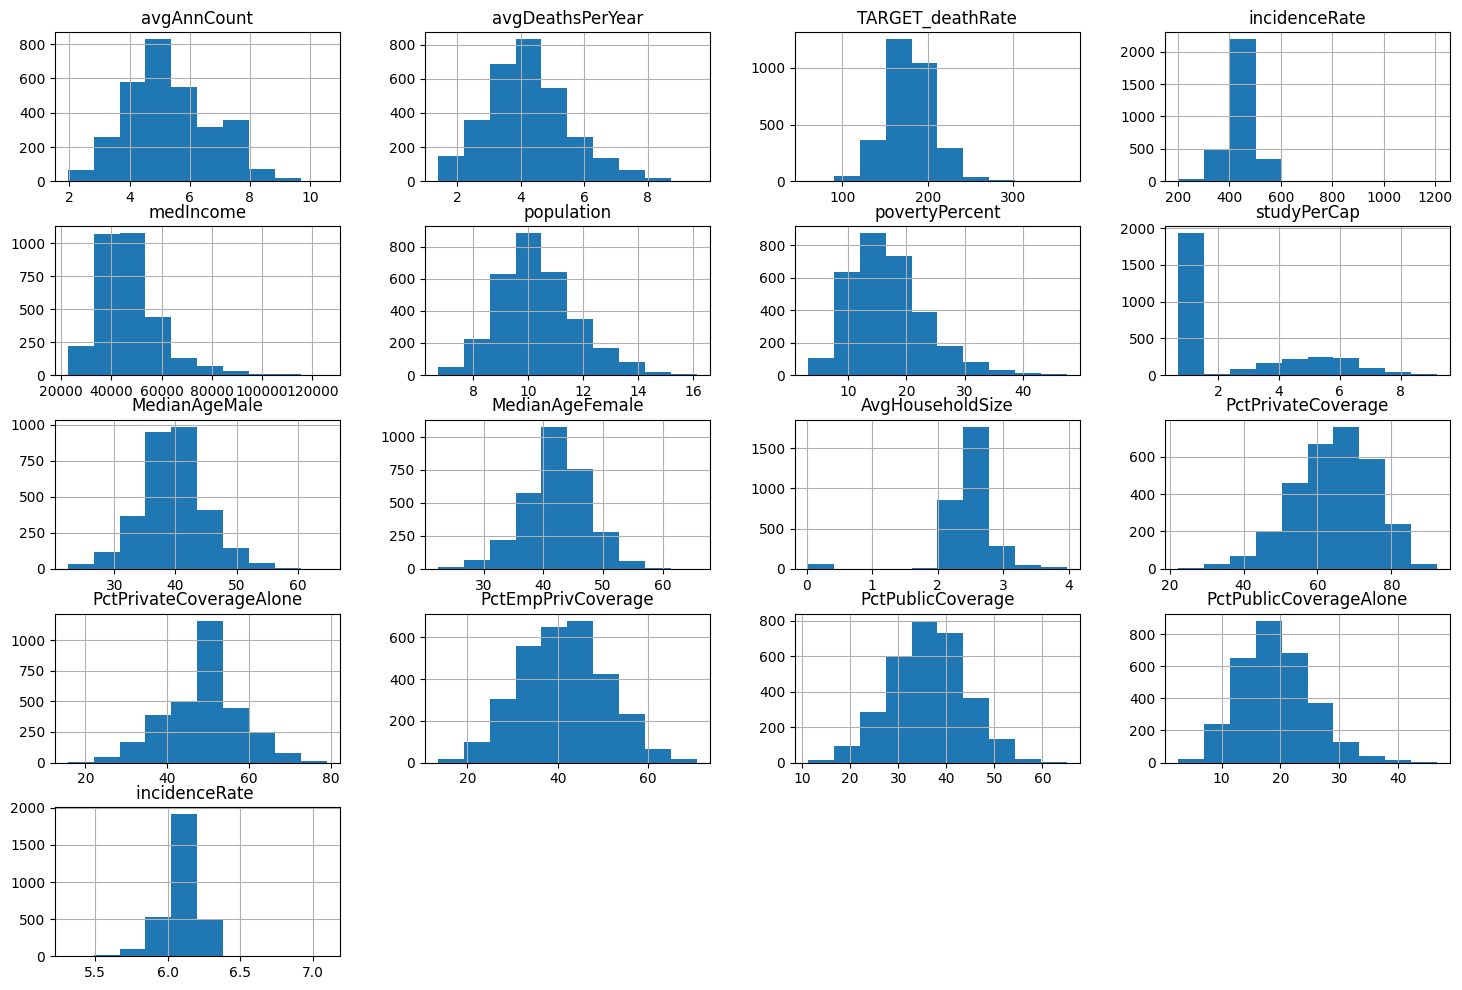

In [16]:
data.hist(figsize=(18,12));

In [17]:
x=data.drop('TARGET_deathRate',axis=1)
y=data['TARGET_deathRate']

## training and testing split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [19]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [20]:
y_predict=model.predict(x_test)


## logistic regression analysis

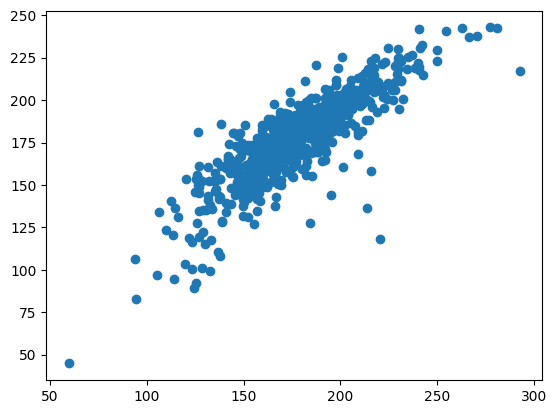

In [21]:
plt.scatter(y_test,y_predict)

C:\Users\Prativa\AppData\Local\Temp\ipykernel_17768\3132312691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test,y_predict),bins=50);


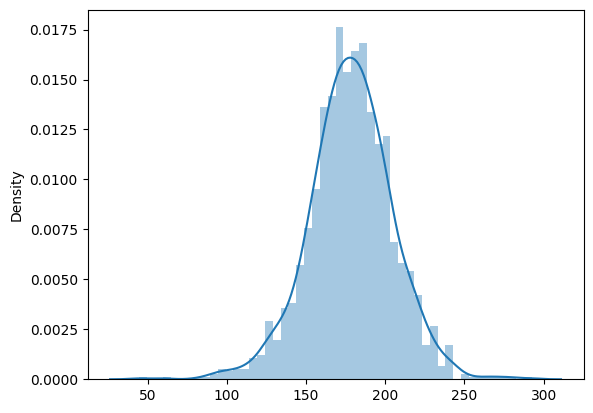

In [22]:
sns.distplot((y_test,y_predict),bins=50);

## Evaluate the model

In [23]:
#r2_score is a statistical measure of how well the regression predictions approximate the real data points
r2_score(y_test,y_predict)

0.7202580836382905

In [24]:
pred_y_df=pd.DataFrame({'actual':y_test,'predicted_value':y_predict,'difference':y_test-y_predict})
pred_y_df[0:4]

actual  predicted_value  difference
1582   186.5       191.068285   -4.568285
2367   152.5       159.923427   -7.423427
2091   174.2       174.799436   -0.599436
343    207.6       184.501193   23.098807

## decision tree regression

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
regr = DecisionTreeRegressor(max_depth=50)
regr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=50)

In [27]:
y_predict1=regr.predict(x_test)

In [28]:
r2_score(y_test,y_predict1)

0.08023472196137793

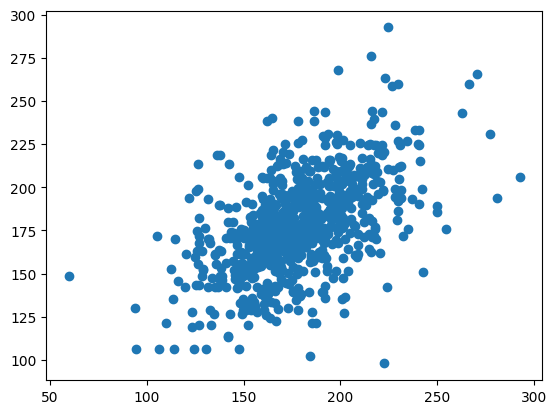

In [29]:
plt.scatter(y_test,y_predict1)

In [30]:
pred_y_df1=pd.DataFrame({'actual':y_test,'predicted_value':y_predict1,'difference':y_test-y_predict1})
pred_y_df1[0:4]

actual  predicted_value  difference
1582   186.5            180.0         6.5
2367   152.5            173.1       -20.6
2091   174.2            164.9         9.3
343    207.6            198.5         9.1

C:\Users\Prativa\AppData\Local\Temp\ipykernel_17768\597334423.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test,y_predict1),bins=50);


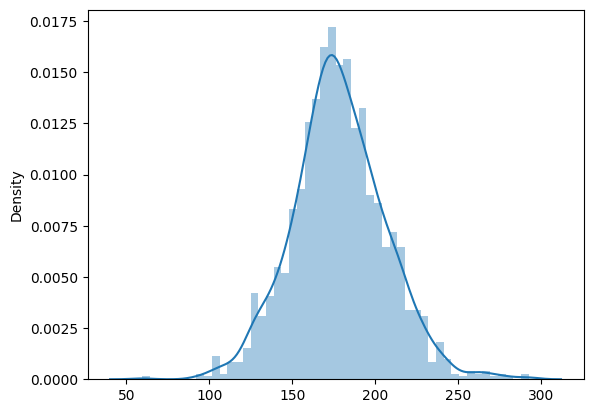

In [31]:
sns.distplot((y_test,y_predict1),bins=50);